# ImageDataGenerator
- 학습시 모델에 Image dataset을 제공하는 파이프라인 Generator
    - Image 데이터들을 Network(모델)에 배치단위로 제공한다.
    - 다양한 Image Augmentation(이미지증식) 기능을 제공한다. 
        - Data제공 파이프라인에 Image Augmentation을 쉽게 적용할 수 있다.
- 전체 데이터를 한번 다 제공하더라도 계속 요청하면 반복해서 제공한다.
    - https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

## ImageDataGenerator()
- tensorflow.keras.preprocessing.image.ImageDataGenerator
    - Image 제공 데이터파이프라인을 어떻게 만들지 설정한다.
    
- **매개변수**: 이미지 증식(augmentation) 관련 설정을 정의
    -  <span style='background-color:#fff5b1'>**fill_mode**</span>: 이동이나 회전시 생기는 공간을 어떻게 채울 것인지 설정
        - nearest: 빈공간에 가장 가까운 pixel로 채우기 (1,2,3 [3],[3],[3])
        - reflect: 빈공간 근처 공간의 값을 거울로 반사되는 값들으로 채움. (1,2,3 [3],[2],[1])
        -  <span style='background-color:#fff5b1'>constant</span>: 지정한 값으로 채움.  <span style='background-color:#fff5b1'>**기본은 0**</span>이고  <span style='background-color:#fff5b1'>**특정값으로 채울때는 cval=100**</span> 으로 설정
    - **Nomalization 설정**
        - <span style='background-color:#fff5b1'> **rescale**: 지정한 값을 각 픽셀에 곱한다. (rescale=1/255.)
        - **featurewise_center=True**: channel의 평균을 pixel에서 빼서 평균 0으로 표준화한다. (channl 별로 처리)
        -  <span style='background-color:#fff5b1'>**featurewise_std_nomalization=True**: channel 별로 표준화한다. (평균 0, 표준편차 1)
    - **반전**
         -  <span style='background-color:#fff5b1'>**horizontal_flip=True**: 좌우반전, **vertical_flip=True**: 상하 반전
    - **회전(rotation)**
         - **rotation_range**=정수:  -정수 ~ +정수 범위로 랜덤 회전 (rotation_rate=30 : -30 ~ +30도 사이에서 랜덤하게 회전)
    - **이동**
         -  <span style='background-color:#fff5b1'>**width_shift_range=실수**: 좌우이동, **height_shift_range=실수**: 상하 이동
         - 실수값: 이동범위지정.  0 ~ 1 이면 이미지 너비, 높이 기준 비율. 1이상이면 pixel. 
         - 정수: [-정수, 0, +정수]  범위
         - ex) 0.5 = 0% ~ 50%, 5 = [-5, 0 , 5] 범위
         
    - **Zoom**
         -  <span style='background-color:#fff5b1'>**zoom_range**</span>: 실수 또는 [lower, upper]
             - 실수: [1-실수값, 1+실수값]
             - 리스트: 원하는 비율류 lower, upper 지정할때. 설정한 값이 1미만이면 확대(zoom in), 1초과면 축소(zoom out)
    - **shear(전단변환)**: 평행사변형 형태로 변환
        -  <span style='background-color:#fff5b1'>**shear_range**</span>: 실수 - 각도 지정
    - **명암 (brightness)**
        -  <span style='background-color:#fff5b1'>**brightness_range**</span> : 실수값 2개를 가지는 튜플이나 리스트. 명암 범위
        -  <span style='background-color:#fff5b1'>1이 원본. 0에 가까우면 **어둡고** 1보타 크면 **밝아진다**. 
          
- **flow 메소드들**
    - ImageDataGenerator에 Image Data를  연결하여 batch 단위로 공급하는 Iterator 생성해준다.
    - Raw Image data의 위치에 따라 다양한 메소드를 제공한다.

## ImageDataGenerator에 dataset을 제공하는 메소드

- ### <span style='background-color:#fff5b1'> flow_from_directory () </span>
    - 학습시 파일 경로에 저장된 디렉토리로 부터 이미지를 읽어와 변형 처리 후 모델(네트워크)에 제공하는 Iterator 생성.
    - 주요 매개변수
        - directory: 이미지 저장 경로 (이미지는 지정한 디렉토리내에 클래스 별로 디렉토리가 나눠져 저장되 있어야 한다. 오름차순으로 Label이 생성.),
        - <span style='background-color:#fff5b1'>**target_size**</span>: 이미지 크기. 지정한 크기로<span style='background-color:#fff5b1'> resize한다.</span> 기본값: (256,256)
        - <span style='background-color:#fff5b1'>**color_mode**: "grayscale", "rgb", "rgba"(4차원)</span> 중에 하나를 지정. 기본값: "rgb"
        - <span style='background-color:#fff5b1'>**class_mode**</span>: 분류 종류 지정
            - <span style='background-color:#fff5b1'>**'binary'**</span> : binary class 분류
            - <span style='background-color:#fff5b1'>**'category'**</span> : multi class 분류. label(output)이 one hot encoding 된 경우 지정
            - <span style='background-color:#fff5b1'>**'sparse'**</span> : multi class 분류. label(output)이 label encoding 형식인 경우 지정
            - None: 기본값. 하위디렉토리로 추론
        - batch_size: 미니배치 사이즈 지정 (기본 : 32)
    - 반환값
        - DirectoryIterator: batch size만큼 image와 label을 제공하는 Generator
    - 지정한 directory의 구조
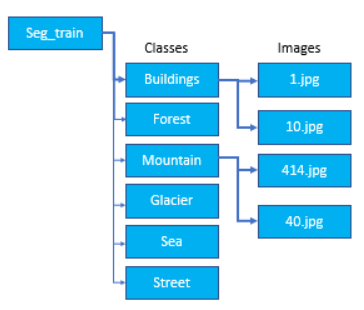
    
    - **Directory 이름을 class name으로 한다.**
    - class 조회: `DirectoryIterator객체.class_indices.keys()`

- ### <span style='background-color:#fff5b1'>flow_from_dataframe()</span>
    - 읽어올 파일의 경로와 label을 DataFrame으로 생성한 뒤 그것을 이용해 파일을 Loading한다.
    - dataframe
        - DataFrame: image 데이터의 절대경로와 label을 저장한 DataFrame객체
        - x_col: image경로 컬럼명
        - y_col: label 컬럼명
        - target_size: 이미지 크기. 지정한 크기로 resize한다. 기본값: (256,256)
        - color_mode: "grayscale", "rgb", "rgba" 중에 하나를 지정. 기본값: "rgb"
        - class_mode: 분류 종류 지정
            - 'binary' : binary class 분류
            - 'category' : multi class 분류. label(output)이 one hot encoding 된 경우 지정
            - 'sparse' : multi class 분류. label(output)이 label encoding 형식인 경우 지정
            - None: 기본값. 하위디렉토리로 추론
        - batch_size: 미니배치 사이즈 지정 (기본 : 32)
- ### flow()
    - ndarray 타입의 이미지를 받아서 처리. 
    - 주요 매개변수
        - x: input data. 4차원 배열(크기, height, width, channel)
        - y: labels. 
        - batch_size: 미니 배치 크기(기본값:32)
- ### 모델(네트워크)에서 fit() 호출하기 전까지는 preprocessing과 Data Loading이 실행되지 않는다.

## 흐름
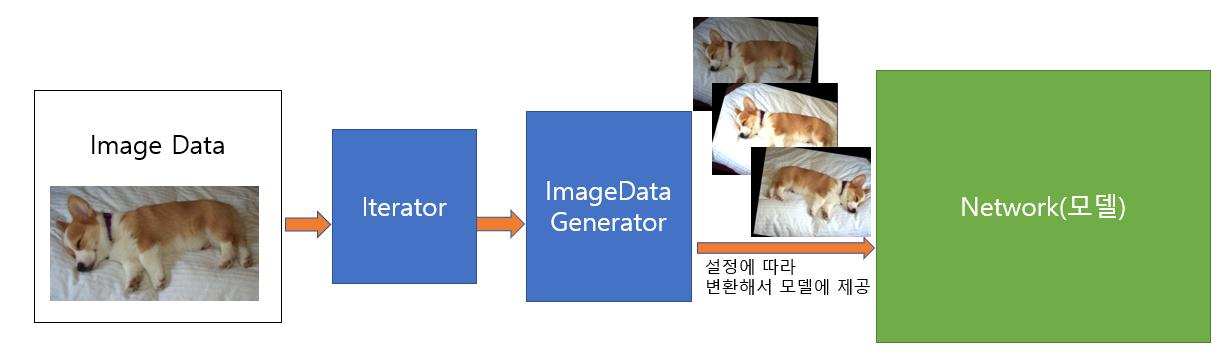

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.preprocessing.image import load_img # 이미지 경로를 주면 이미지를 loading 한다. Pillow 라이브러리 사용. Pillow 이미지객체를 반환(JpegImageFile)
from tensorflow.keras.preprocessing.image import img_to_array # Pillow Image 객체를 numpy의 ndarray로 변환.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img = load_img('test_img/image.jpg')
print(type(img))
img

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [8]:
# 이미지를 ndarray로 변환
data = img_to_array(img)
print(type(data), data.shape)
# batch 축 추가
sample = data[np.newaxis,...]
sample.shape

<class 'numpy.ndarray'> (450, 600, 3)


(1, 450, 600, 3)

In [ ]:
# Generator 생성
datagen = ImageDataGenerator() #next()하면 계속 이미지를 제공한다.
# print(type(datagen))
# datagen = ImageDataGenerator(rescale=1./255)
# datagen = ImageDataGenerator(width_shift_range=0.5)
# datagen = ImageDataGenerator(height_shift_range=200)
# datagen = ImageDataGenerator(shear_range=40., fill_mode='constant')
# datagen = ImageDataGenerator(rotation_range=40, fill_mode='reflect')
# datagen = ImageDataGenerator(zoom_range=2, fill_mode='constant')
# datagen = ImageDataGenerator(shear_range=5, fill_mode='constant', cval=255)
# datagen = ImageDataGenerator(brightness_range=(0.3,1.3))
# datagen = ImageDataGenerator(horizontal_flip=True)
# datagen = ImageDataGenerator(vertical_flip=True)

# datagen = ImageDataGenerator(
# #                 rescale=1./255
#                 rotation_range=20,
#                 width_shift_range=0.1,
#                 height_shift_range=0.1,
#                 zoom_range=0.2,
#                 brightness_range=(0.5,1.5),
#                 horizontal_flip=True,
#                 shear_range=5,
#                 fill_mode = 'constant'
# )


fig = plt.figure(figsize=(10,10))
iterator = datagen.flow(sample, batch_size=1)


type(datagen)

for i in range(9):
    plt.subplot(3,3,i+1)
    batch = next(iterator)
#     print(batch.shape)
#     break
    img = batch[0].astype('uint8') 
    plt.imshow(img)
    
plt.tight_layout()
plt.show()    